## This notebook is for plotting loss curves from BioGPT log files

This script is a modified version from Salma

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Epochs
epochs     = !cat  2023_04_22_jacob_train.out | grep 'train | epoch' | cut -d'|' -f4 | cut -d' ' -f3

# Losses
train_loss = !cat 2023_04_22_jacob_train.out | grep 'train | epoch' | cut -d'|' -f5 | cut -d' ' -f3
valid_loss = !cat 2023_04_22_jacob_train.out | grep 'valid | epoch' | cut -d'|' -f6 | cut -d' ' -f3

# Performance metrics

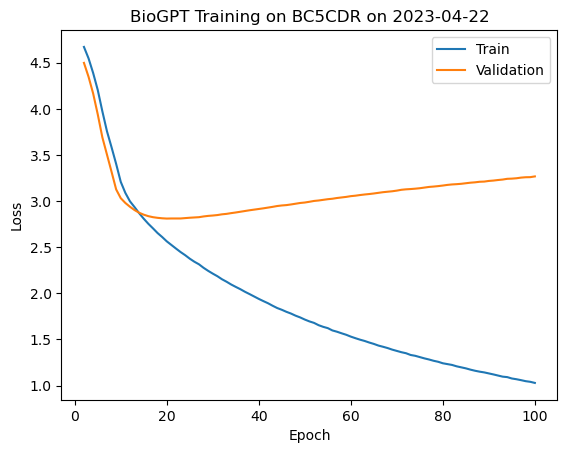

In [12]:
train_loss_array = []
val_loss_array   = []
epoch_array      = []

for epoch, t_loss, v_loss, in zip(epochs, train_loss, valid_loss):
    epoch_array.append(float(epoch.strip()))
    train_loss_array.append(float(t_loss.strip()))
    val_loss_array.append(float(v_loss.strip()))

plt.figure()
plt.plot(epoch_array, train_loss_array)
plt.plot(epoch_array, val_loss_array)
plt.title("BioGPT Training on BC5CDR on 2023-04-22")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])

# plt.figure()
# plt.plot(epoch_array,lr_array)
# #plt.title(model_name[0]+'_'+data_set[0])
# plt.ylabel('Learning rate')
# plt.xlabel('epoch')

In [22]:
# Loading from PyTorch instead
import torch
checkpoint = torch.load("../checkpoints/RE-BC5CDR-BioGPT/checkpoint_last.pt")
checkpoint

{'args': None,
 'cfg': {'_name': None,
  'common': {'_name': None,
   'no_progress_bar': False,
   'log_interval': 100,
   'log_format': None,
   'log_file': None,
   'aim_repo': None,
   'aim_run_hash': None,
   'tensorboard_logdir': None,
   'wandb_project': None,
   'azureml_logging': False,
   'seed': 1,
   'cpu': False,
   'tpu': False,
   'bf16': False,
   'memory_efficient_bf16': False,
   'fp16': False,
   'memory_efficient_fp16': False,
   'fp16_no_flatten_grads': False,
   'fp16_init_scale': 128,
   'fp16_scale_window': None,
   'fp16_scale_tolerance': 0.0,
   'on_cpu_convert_precision': False,
   'min_loss_scale': 0.0001,
   'threshold_loss_scale': None,
   'amp': False,
   'amp_batch_retries': 2,
   'amp_init_scale': 128,
   'amp_scale_window': None,
   'user_dir': '../../src',
   'empty_cache_freq': 0,
   'all_gather_list_size': 16384,
   'model_parallel_size': 1,
   'quantization_config_path': None,
   'profile': False,
   'reset_logging': False,
   'suppress_crashes': Fa